# CQArchaeo: usage example

This notebook provides a complete example of the `CQArchaeo` library. This notebook can be used to replicate or perform an analysis.

**Notes**:

This is a Jupyter notebook that can contain both text and Python code. To run code in a cell, simply press the Start button to the right of the cell, or press `Shift` + `Enter` on your keyboard.


We first install the package from [Pypi](https://pypi.org/)

In [1]:
! pip install cqarchaeo

<hr>

Once the package is installed, we can import our data.

Since we are in Google Colab, we need to upload the data to Google Drive. A button allows the selection of the file to be analysed.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ialongo_etal_2021_Mesopotamia.xlsx to Ialongo_etal_2021_Mesopotamia.xlsx


The file is now uploaded to Google Colab. Now we can proceed with the analysis.

First, we will import the package and functions


In [3]:
### Import the package
from cqarchaeo import CQAnalysis

CQAnalysis is a class, so it must be instantiated. In this case we have chosen the name `cqa_mesopotamia` as the variable. The name is completely arbitrary.
A set of variables defines the parameters that will determine the result of the analysis. The main parameter is the date, i.e. the previously loaded file. The file must be given the same name as when it was uploaded (complete with extension), in this case "`Ialongo_etal_2021_Mesopotamia.xlsx`".

A description is given for each parameter, as in the package documentation.

In [18]:
cqa_mesopotamia = CQAnalysis(data = 'Ialongo_etal_2021_Mesopotamia.xlsx',  # path to the file to be imported. The file must be a csv or excel file with only one column.
                 min_value = 5, # minimum number of data to be considered (default: 5).
                 max_value = 200, # maximum number of data to be considered (default: 200).
                 min_quantum = 5, # minimum quantum to be considered (default: 5).
                 max_quantum = 24, # maximum quantum to be considered (default: 24).
                 step = 0.02, # step between two consecutive quanta (default: 0.02).
                 Montecarlo_sim = True, # if True, a Montecarlo simulation is performed (default: True).
                 mc_parameter = 0.15, # parameter for the Montecarlo simulation (default: 0.15).
                 mc_iterations = 100) # number of iterations for the Montecarlo simulation (default: 100).



Highest 'φ(q)': 14.90, corrisponding to quantum: 8.30


Computing Montecarlo simulation: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


Per salvare un file xlsx o csv con i valori dell'analisi, è sufficiente utilizzare il seguente comando

In [19]:
cqa_mesopotamia.save_quanta()

The command will create a file called '`Quanta_table.xlsx`' in the Colab folder. To access the file, simply click on the small folder icon called '**File**' on the left-hand side of Colab. This will open a list of files, including the file you have just loaded, '`Ialongo_etal_2021_Mesopotamia.xlsx`'. Simply right click on `Quanta_table.xlsx` and click '**Download**' to save the file locally.

To plot the results using the `CQArcheo` functions, simply use the `plot_quantogram` method instead.

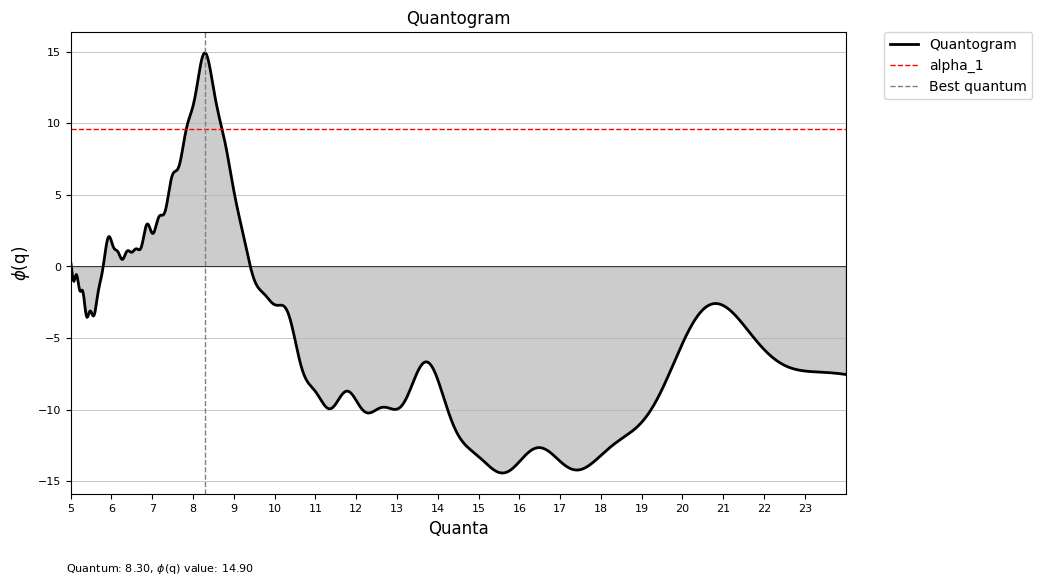

In [23]:
cqa_mesopotamia.plot_quantogram(
    figsize= (10, 6), # size of the figure (default: (10, 6)).
    title = "Quantogram", # title of the figure (default: "Quantogram").
    plot_best_quantum=True, # if True, the best quantum is plotted (default: True).
    legend_outside=True, # if True, the legend is placed outside the figure (default: True).
    plot_alpha_1= True, # if True, the alpha_1 value is plotted (default: True).
    plot_alpha_5= False, # if True, the alpha_5 value is plotted (default: True).
    x_step = 1, # step between x-axis ticks (default: 1).
    fill_between = True, # if True, the area under the quantogram is filled (default: True).
    save = True, # if True, the figure is saved (default: False).
    dpi = 300 # resolution of the figure (default: 300).
)

The parameters of this method are highly customisable and provide several functions to manage the aesthetics of the plot. The `save` parameter works in the same way as the `save_quanta()` method: in **File** you will find a file called '`Quantogram.png`', which can be downloaded in the same way as the table '`Quanta_table.xlsx`'.

To compare multiple quantograms, we can use the `compare_quantograms` function:

In [24]:
from cqarchaeo import compare_quantograms

But before that, it is necessary to load and implement the instance of another file:

In [26]:
uploaded = files.upload()

Saving Ialongo_etal_2021_Europe.xlsx to Ialongo_etal_2021_Europe (1).xlsx


In [27]:
cqa_europe = CQAnalysis(data = 'Ialongo_etal_2021_Europe.xlsx',  # path to the file to be imported. The file must be a csv or excel file with only one column.
                 min_value = 5, # minimum number of data to be considered (default: 5).
                 max_value = 200, # maximum number of data to be considered (default: 200).
                 min_quantum = 5, # minimum quantum to be considered (default: 5).
                 max_quantum = 24, # maximum quantum to be considered (default: 24).
                 step = 0.02, # step between two consecutive quanta (default: 0.02).
                 Montecarlo_sim = True, # if True, a Montecarlo simulation is performed (default: True).
                 mc_parameter = 0.15, # parameter for the Montecarlo simulation (default: 0.15).
                 mc_iterations = 100) # number of iterations for the Montecarlo simulation (default: 100).


Highest 'φ(q)': 3.57, corrisponding to quantum: 9.62


Computing Montecarlo simulation: 100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


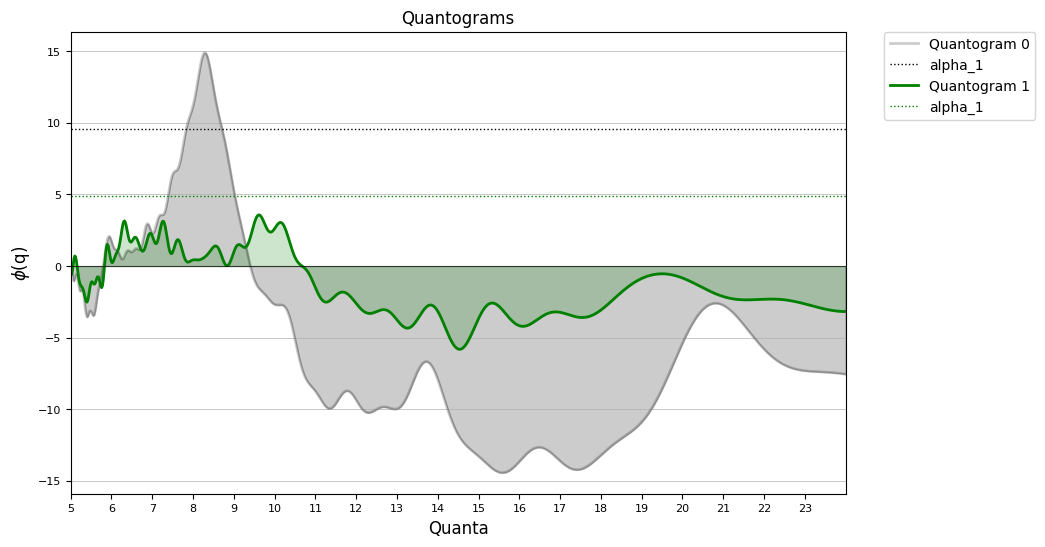

In [28]:

compare_quantograms(quantogram_list = [cqa_mesopotamia, cqa_europe], # list of quantograms (CQAnalysis instances) to be compared.
                    figsize=(10, 6), # size of the figure (default: (10, 6)).
                    color_list=["black", "green"], # list of colors (str) for the quantograms. If None, default colors will be used (default: None).
                    label_list=None, # list of labels (str) for the quantograms. If None, default labels will be used (default: None).
                    plot_montecarlo_bound=[True, True], # if True, the Montecarlo bounds are plotted (default: True). If a list (including bool values) is passed, the bounds are plotted only for the quantograms in the list.
                    alpha_list=[0.2, 1], # list of alpha values (float) for the quantograms. If None, default values will be used (default: None).
                    plot_alpha_1=True, # if True, the alpha_1 value is plotted (default: True).
                    plot_alpha_5=False, # if True, the alpha_5 value is plotted (default: True).
                    fill_between=True, # if True, the area between the quantogram and the x-axis is filled (default: True).
                    legend_outside=True, # if True, the legend is placed outside the figure (default: True).
                    x_step=1, # step between x-axis ticks (default: 1).
                    save=True, # if True, the figure is saved (default: False).
                    dpi=300 # resolution of the figure (default: 300).
                    )

If the documentation states that the parameter must be a list (e.g. `colour_list`, `label_list`, `plot_montecarlo_bound`, etc.), the list must be the same length as `quantogram_list`. In this case 2 quantograms are compared, if 3 are compared, the length of the parameter list must be 3 values. To save and download the graph, use the same methods as defined above.